# Measuring Bias and Variance for Classification

### Importing packages 

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

### Reading train dataset

In [2]:
train = pd.read_csv("train-1542197608821.csv")

### Exploratory Data Analysis

In [3]:
train.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


#### Checking the shape of the data 

In [4]:
train.shape

(8001, 27)

In [5]:
train.columns

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender', 'ID'],
      dtype='object')

#### Checking for missing values 

In [6]:
train.isnull().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


There are no missing values

In [7]:
train.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net,ID
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,1.398700,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988,5004.917260
std,3.548182,0.489661,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788,2895.018795
min,3.000000,1.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201,1.000000
25%,3.000000,1.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164,2500.000000
50%,5.000000,1.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559,4996.000000
75%,7.000000,2.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135,7523.000000
max,38.000000,2.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257,10000.000000


#### Checking the datatype of the variables 

In [8]:
train.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

### Converting the datatype 

In [9]:
train['serve'] = train['serve'].astype('category')

In [10]:
train['serve'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

#### Declaring categorical variables

In [11]:
categorical = ['serve','hitpoint','outside.sideline','outside.baseline','same.side','previous.hitpoint','server.is.impact.player','outcome','gender']

### Label Encoding the categorical Variables 

In [12]:
le = LabelEncoder()
for i in categorical:
    train[i] = train[i].astype('category')
    train[i] = le.fit_transform(train[i])

#### Dropping ID

In [13]:
train.drop(columns = ['ID'], axis = 1, inplace = True)

#### Creating a dataframe, where x contains all the trainable variables except the target variable

In [14]:
x = train[['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'gender']]

#### Y contains only the target variable 

In [15]:
y = train['outcome']

### Splitting data into train and validation(test) 
#### We are splitting the data into train and validation, where the validation data/test data has 20% of the original data

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x,y,random_state = 123,test_size=0.20)

#### Checking the shape of x_train, y_train, x_val, y_val

In [17]:
x_train.shape

(6400, 25)

In [18]:
x_val.shape

(1601, 25)

In [19]:
y_train.shape

(6400,)

In [20]:
y_val.shape

(1601,)

### Formula for calculating Bias_square and Variance is as follows
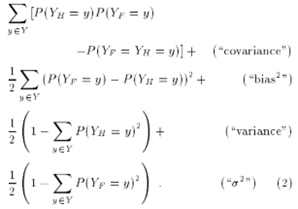

# Creating a function for calculating the Bias_Square for each data point

In [21]:
# Function represents the formula for calculating Bias_square

def bias_square_calculations(y_true,probability_values):
    bias_square = []
    y_true = list(y_true)
    for i in range(len(y_true)):
        position = int(y_true[i])
        z0 = 0
        z1 = 0
        z2 = 0
        if position == 0:
            z0 = 1
        if position == 1:
            z1 = 1
        if position == 2:
            z2 = 1
        first = (z0-probability_values[i][0])**2
        second = (z1-probability_values[i][1])**2
        third = (z2-probability_values[i][2])**2
        total = (first+second+third)*0.5
        bias_square.append(float(total))
    return bias_square

## Creating a function for calculating the Variance for each data point


In [22]:
# This Function represents the formula for calculating Variance

def variance_calculations(probability_values):
    variance = []
    for i in range(len(probability_values)):
        total_sum = 0
        for j in range(len(probability_values[i])):
            total_sum += (probability_values[i][j])**2
        variance.append(((1-total_sum)*0.5))
    return variance

### Importing the packages for modeling

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## Logistic Regression

#### Building Logistic Regression Modelmodel

In [24]:
logistic = LogisticRegression()
# fitting the model on x_train and y_train
logistic.fit(x_train,y_train)
# Predicting on the validation data
logistic_pred = logistic.predict(x_val)

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
# Getting the predicted values
logistic_pred

array([1, 2, 0, ..., 1, 1, 1])

#### Getting the Probability Values for each class

In [26]:
logReg_probs = logistic.predict_proba(x_val)

In [27]:
# Probability values of each class are represented below for the first 20 rows/observations
logReg_probs[:20]

array([[2.88310899e-01, 5.09670448e-01, 2.02018653e-01],
       [9.97886450e-03, 1.81822780e-01, 8.08198356e-01],
       [5.92978278e-01, 4.04889706e-01, 2.13201573e-03],
       [1.06593001e-02, 9.56238089e-02, 8.93716891e-01],
       [7.25718051e-02, 8.30383939e-02, 8.44389801e-01],
       [9.74693570e-03, 9.89590438e-01, 6.62626459e-04],
       [1.04785841e-01, 2.81552438e-01, 6.13661721e-01],
       [8.84814044e-01, 7.98916140e-02, 3.52943425e-02],
       [1.60749312e-01, 7.24104816e-03, 8.32009640e-01],
       [7.05734414e-01, 2.91479882e-01, 2.78570365e-03],
       [4.59394988e-01, 5.30700534e-01, 9.90447790e-03],
       [8.40653328e-05, 1.20291441e-01, 8.79624493e-01],
       [2.33812200e-02, 9.12480546e-01, 6.41382341e-02],
       [5.50756304e-01, 4.14064496e-01, 3.51791995e-02],
       [2.92009567e-02, 9.70729952e-01, 6.90915545e-05],
       [9.11850894e-04, 9.96044793e-02, 8.99483670e-01],
       [9.81975977e-03, 4.26525641e-01, 5.63654599e-01],
       [6.76280310e-01, 3.19234

calculating the bias square

In [28]:
bias2_LR = bias_square_calculations(y_val,logReg_probs)
bias2_LR

[0.4898306854978001,
 0.034973485923635556,
 0.35289202308601797,
 0.8083698984339036,
 0.01818828789751855,
 0.00010190040682601874,
 0.6286304371910016,
 0.01044808258527876,
 0.8518253594824194,
 0.08578025855601062,
 0.28699746715196234,
 0.014480150238542083,
 0.006160024684535699,
 0.32394524867168895,
 0.0008547181840178049,
 0.010012708193892543,
 0.3233378879579101,
 0.10336275459614491,
 0.10029031869866034,
 0.002548101190307249,
 0.1748006896473427,
 0.023646487576128545,
 0.9098364892473023,
 0.024636604449203927,
 0.8244389724958854,
 0.4843956496720065,
 0.18570760216939786,
 0.04973530649282646,
 0.11322841636842093,
 0.3582337939230196,
 0.07405814489280674,
 0.28838642815790894,
 0.021414908399352724,
 0.2270202624464251,
 0.027337571499195544,
 0.010356524120809587,
 0.04622146198968261,
 0.0005966644723266536,
 0.007631438028967227,
 0.11692336232295465,
 0.006099702016528857,
 0.02221762899823138,
 0.2416272424606647,
 0.04496850937164761,
 0.4687821218679929,
 0.1

#### calculating the variance for each datapoint

In [29]:
variance_LR = variance_calculations(logReg_probs)

In [30]:
variance_LR

[0.3081506618815514,
 0.15682815851131332,
 0.24221827098150306,
 0.09600629262932453,
 0.13742191111490987,
 0.010307661750681596,
 0.2665837221172752,
 0.10473787389936223,
 0.14093359235531405,
 0.20848532748556875,
 0.2536075447225225,
 0.10589535631731783,
 0.08135942940819268,
 0.2619902550812451,
 0.0284153300480543,
 0.09050362195876877,
 0.250136471292121,
 0.2203569351527967,
 0.24142517148555964,
 0.049571105708407504,
 0.24339515923610355,
 0.15361996641134668,
 0.05561062841865927,
 0.13526571476049976,
 0.11013249439122202,
 0.22192804955533096,
 0.2465247682556414,
 0.17422826562963267,
 0.2273092150698432,
 0.2408187785060304,
 0.22362907268218002,
 0.24863026825122136,
 0.12571800238144443,
 0.2527574402588638,
 0.153572773119037,
 0.09489163440964227,
 0.201003372798433,
 0.02493428265286013,
 0.08909030180711847,
 0.2253643479069345,
 0.08398751958905354,
 0.13796152358788333,
 0.2532894575306789,
 0.16967692830117787,
 0.27030923221145553,
 0.21926935989674867,
 0.1

#### Calculating Bias_square for logistic regression model by taking the average of all bias_square values

In [31]:
avg_bias_lr = np.mean(bias2_LR)
avg_bias_lr

0.14545996246687362

#### Calculating Variance for logistic regression model by taking the average of all Variance values 

In [32]:
avg_var_lr = np.mean(variance_LR)
avg_var_lr

0.17757019802250648

## Decision Tree 

In [33]:
DT = DecisionTreeClassifier(random_state=0,max_depth=8)
## Setting max depth to 8 and random state as 0.

In [34]:
# Fitting the model on train data
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [35]:
# Predicting on the validation data
DT_pred = DT.predict(x_val)

In [36]:
# Predicted values
DT_pred[:10]

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 0])

#### Getting the Probability Values for each class

In [37]:
DT_probs = DT.predict_proba(x_val)

In [38]:
# Getting the probability values for the first 20 rows
DT_probs[:20]

array([[0.00537634, 0.01612903, 0.97849462],
       [0.00537634, 0.01612903, 0.97849462],
       [0.22727273, 0.77272727, 0.        ],
       [0.02173913, 0.82608696, 0.15217391],
       [0.03292181, 0.05761317, 0.90946502],
       [0.04013378, 0.9548495 , 0.00501672],
       [0.14285714, 0.64285714, 0.21428571],
       [0.2       , 0.8       , 0.        ],
       [0.08695652, 0.89130435, 0.02173913],
       [0.94285714, 0.05714286, 0.        ],
       [0.2       , 0.8       , 0.        ],
       [0.03292181, 0.05761317, 0.90946502],
       [0.02173913, 0.82608696, 0.15217391],
       [0.94736842, 0.05263158, 0.        ],
       [0.04013378, 0.9548495 , 0.00501672],
       [0.00537634, 0.01612903, 0.97849462],
       [0.02448211, 0.97175141, 0.00376648],
       [0.88888889, 0.03703704, 0.07407407],
       [0.        , 1.        , 0.        ],
       [0.00537634, 0.01612903, 0.97849462]])

### Calculating  Bias_square for decision tree model for each data point

In [39]:
bias2_DT = bias_square_calculations(y_val,DT_probs)
bias2_DT

[0.000375765984506879,
 0.000375765984506879,
 0.05165289256198347,
 0.026937618147448016,
 0.00629985266473607,
 0.0018372277715014362,
 0.5969387755102041,
 0.6400000000000001,
 0.009924385633270326,
 0.0032653061224489806,
 0.6400000000000001,
 0.00629985266473607,
 0.026937618147448016,
 0.8975069252077562,
 0.0018372277715014362,
 0.000375765984506879,
 0.0007057713655434606,
 0.009602194787379979,
 0.0,
 0.000375765984506879,
 0.0,
 1.0,
 0.6944444444444445,
 0.0029987009675970303,
 0.0,
 0.94797507456705,
 0.000375765984506879,
 0.00629985266473607,
 0.000375765984506879,
 0.0013511899429663491,
 0.0007057713655434606,
 0.22032486463973344,
 0.02777777777777777,
 0.000375765984506879,
 0.0,
 0.0,
 0.007982913763523692,
 0.0018372277715014362,
 0.0018372277715014362,
 0.0,
 0.0007057713655434606,
 0.000375765984506879,
 1.0,
 0.000375765984506879,
 1.0,
 0.0007057713655434606,
 1.0,
 0.003252902311729245,
 0.0006574621959237349,
 0.0018372277715014362,
 0.002811418685121108,
 0.0

#### Taking the mean for calculating average bias_square for Decision Tree 

In [40]:
DT_bias2 = np.mean(bias2_DT)
DT_bias2

0.13753109364596303

### Calculating Variance for decision tree model for each data point

In [41]:
variance_DT = variance_calculations(DT_probs)

In [42]:
variance_DT

[0.02112961035957911,
 0.02112961035957911,
 0.17561983471074383,
 0.14697542533081287,
 0.0842351267591323,
 0.04331327390073936,
 0.260204081632653,
 0.15999999999999992,
 0.09877126654064278,
 0.05387755102040814,
 0.15999999999999992,
 0.0842351267591323,
 0.14697542533081287,
 0.049861495844875425,
 0.04331327390073936,
 0.02112961035957911,
 0.027542816205077925,
 0.10150891632373116,
 0.0,
 0.02112961035957911,
 0.0,
 0.0,
 0.13888888888888884,
 0.05623474850975485,
 0.0,
 0.027542816205077925,
 0.02112961035957911,
 0.0842351267591323,
 0.02112961035957911,
 0.03963241661441075,
 0.027542816205077925,
 0.24906289046230734,
 0.13888888888888884,
 0.02112961035957911,
 0.0,
 0.0,
 0.08669164244949407,
 0.04331327390073936,
 0.04331327390073936,
 0.0,
 0.027542816205077925,
 0.02112961035957911,
 0.0,
 0.02112961035957911,
 0.0,
 0.027542816205077925,
 0.0,
 0.05378131822059018,
 0.024983563445101886,
 0.04331327390073936,
 0.05601211072664358,
 0.04331327390073936,
 0.24653979238

#### Taking the mean for calculating average variance for Decision Tree

In [43]:
DT_variance = np.mean(variance_DT)
DT_variance

0.07097062961525283

## Random Forest 

In [44]:
RF = RandomForestClassifier(random_state=123)
# Setting random state as '123'

In [45]:
# Fitting the model on train data
RF.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

#### Predicting on validation data

In [46]:
RF_pred = RF.predict(x_val)

In [47]:
RF_pred

array([2, 2, 1, ..., 1, 1, 1])

#### Getting the Probability Values for each class

In [48]:
RF_probs = RF.predict_proba(x_val)

In [49]:
# Getting the probability values for the first 20 rows
RF_probs[:20]

array([[0. , 0.1, 0.9],
       [0.1, 0.1, 0.8],
       [0.1, 0.6, 0.3],
       [0.2, 0.6, 0.2],
       [0. , 0.4, 0.6],
       [0. , 0.9, 0.1],
       [0.1, 0.4, 0.5],
       [0.8, 0.2, 0. ],
       [0.3, 0.6, 0.1],
       [0.9, 0.1, 0. ],
       [0.5, 0.2, 0.3],
       [0.1, 0.2, 0.7],
       [0.1, 0.8, 0.1],
       [0.8, 0.2, 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0.1, 0.9, 0. ],
       [0.9, 0.1, 0. ],
       [0.4, 0.6, 0. ],
       [0.1, 0.6, 0.3]])

#### Calculating  bias square

In [50]:
bias2_RF = bias_square_calculations(y_val,RF_probs)

In [51]:
bias2_RF

[0.009999999999999998,
 0.029999999999999992,
 0.13,
 0.12000000000000002,
 0.16000000000000003,
 0.009999999999999998,
 0.6100000000000001,
 0.039999999999999994,
 0.13,
 0.009999999999999998,
 0.19,
 0.07000000000000002,
 0.029999999999999992,
 0.6400000000000001,
 0.0,
 0.0,
 0.009999999999999998,
 0.009999999999999998,
 0.16000000000000003,
 0.42999999999999994,
 0.0,
 0.039999999999999994,
 0.52,
 0.0,
 0.16000000000000003,
 0.42999999999999994,
 0.009999999999999998,
 0.09000000000000001,
 0.0,
 0.16000000000000003,
 0.0,
 0.31,
 0.09000000000000001,
 0.25,
 0.039999999999999994,
 0.0,
 0.029999999999999992,
 0.009999999999999998,
 0.0,
 0.009999999999999998,
 0.0,
 0.039999999999999994,
 0.21000000000000002,
 0.0,
 0.7300000000000001,
 0.0,
 0.0,
 0.039999999999999994,
 0.07000000000000002,
 0.07000000000000002,
 0.009999999999999998,
 0.36,
 0.16000000000000003,
 0.009999999999999998,
 0.009999999999999998,
 0.039999999999999994,
 0.5700000000000001,
 0.009999999999999998,
 0.1

#### Taking the average of Bias_square 

In [52]:
RF_bias2 = np.mean(bias2_RF)
RF_bias2

0.12065584009993754

#### Calculating the variance

In [53]:
variance_RF = variance_calculations(RF_probs)

In [54]:
variance_RF

[0.08999999999999997,
 0.16999999999999993,
 0.27,
 0.27999999999999997,
 0.24,
 0.08999999999999997,
 0.29,
 0.15999999999999992,
 0.27,
 0.08999999999999997,
 0.31,
 0.23000000000000004,
 0.16999999999999993,
 0.15999999999999992,
 0.0,
 0.0,
 0.08999999999999997,
 0.08999999999999997,
 0.24,
 0.27,
 0.0,
 0.15999999999999992,
 0.27999999999999997,
 0.0,
 0.24,
 0.27,
 0.08999999999999997,
 0.21000000000000002,
 0.0,
 0.24,
 0.0,
 0.29,
 0.21000000000000002,
 0.25,
 0.15999999999999992,
 0.0,
 0.16999999999999993,
 0.08999999999999997,
 0.0,
 0.08999999999999997,
 0.0,
 0.15999999999999992,
 0.29,
 0.0,
 0.16999999999999993,
 0.0,
 0.0,
 0.15999999999999992,
 0.23000000000000004,
 0.23000000000000004,
 0.08999999999999997,
 0.24,
 0.24,
 0.08999999999999997,
 0.08999999999999997,
 0.15999999999999992,
 0.23000000000000004,
 0.08999999999999997,
 0.31,
 0.08999999999999997,
 0.29,
 0.24,
 0.0,
 0.25,
 0.0,
 0.31999999999999995,
 0.08999999999999997,
 0.08999999999999997,
 0.2100000000

#### Taking the average of Variance 

In [55]:
RF_variance = np.mean(variance_RF)
RF_variance

0.1409931292941911

## Support Vector Machine 

In [56]:
SVM = SVC(probability=True)

In [57]:
SVM.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Predicting on validation data 

In [58]:
SVM_pred = SVM.predict(x_val)

In [59]:
SVM_pred

array([1, 2, 0, ..., 1, 0, 1])

#### Getting the Probability Values for each class

In [60]:
SVM_probs = SVM.predict_proba(x_val)

In [61]:
# Getting the probability values for the first 20 rows
SVM_probs[:20]

array([[0.02955965, 0.93787111, 0.03256924],
       [0.00737097, 0.06350279, 0.92912625],
       [0.58123887, 0.26422231, 0.15453882],
       [0.10223815, 0.29035586, 0.60740598],
       [0.06616937, 0.46579381, 0.46803682],
       [0.07261773, 0.48111003, 0.44627224],
       [0.02660957, 0.91495228, 0.05843815],
       [0.7026824 , 0.11580495, 0.18151265],
       [0.51355187, 0.4287928 , 0.05765534],
       [0.9085408 , 0.07905541, 0.01240379],
       [0.34735782, 0.62921096, 0.02343122],
       [0.04494328, 0.09998318, 0.85507354],
       [0.03084966, 0.95819887, 0.01095147],
       [0.76195598, 0.2215991 , 0.01644491],
       [0.02564492, 0.96656317, 0.00779191],
       [0.01029242, 0.01376438, 0.9759432 ],
       [0.01794962, 0.73690273, 0.24514764],
       [0.88516603, 0.07237363, 0.04246034],
       [0.17533843, 0.70766397, 0.11699761],
       [0.40542464, 0.33050484, 0.26407052]])

#### Calculating  bias square

In [62]:
bias2_SVM = bias_square_calculations(y_val,SVM_probs)

In [63]:
bias2_SVM

[0.9081991343813787,
 0.0045550121015233425,
 0.4515448393380591,
 0.4414947348596692,
 0.25216354001983976,
 0.2368395263984948,
 0.8940208115464907,
 0.06737769182151851,
 0.2966686629345523,
 0.007384198729143793,
 0.4111986397071296,
 0.01651010698804633,
 0.001409485608805795,
 0.5933776581622786,
 0.0009181985621281689,
 0.00043706098325588065,
 0.06481986357432945,
 0.010113831141865898,
 0.0649461796769326,
 0.40759739113964966,
 0.005084975938904382,
 0.027192977779264722,
 0.8650024926158794,
 0.00423281057472702,
 0.6065003711577975,
 0.6374478303081029,
 0.07148509448104359,
 0.11731085256181578,
 0.0003140160472092781,
 0.2592183393807601,
 0.0004919756115262097,
 0.3651827142699663,
 0.03257207974350006,
 0.1762581995655375,
 0.03387039961563748,
 0.008974506004909575,
 0.32567719058916406,
 0.004141333590228377,
 0.0013841889744894945,
 0.0047234937648803835,
 0.0008330899412952091,
 0.0002136924503224934,
 0.06877613334575966,
 9.409980406783916e-05,
 0.5229176301883555

#### Taking the average of bias_square 

In [64]:
SVM_bias2 = np.mean(bias2_SVM)
SVM_bias2

0.14939998007080918

#### calculating variance

In [65]:
variance_SVM = variance_calculations(SVM_probs)

In [66]:
variance_SVM

[0.05923162503384799,
 0.06631874208784988,
 0.28423284855138975,
 0.26814940104803714,
 0.2797996388583822,
 0.28205044769893284,
 0.07936961682452937,
 0.22993990852668716,
 0.2745385395472466,
 0.08407500239833698,
 0.24144354409213248,
 0.12841635430065879,
 0.04039164846477655,
 0.18502323993504055,
 0.0325186300735677,
 0.02361974283196505,
 0.19827740185804904,
 0.10472013575625005,
 0.22738985278021084,
 0.3283320863872877,
 0.07205390320606253,
 0.1492749539375961,
 0.08656702798776311,
 0.07076215159271171,
 0.21386326546114054,
 0.16169138515090536,
 0.20450339457163758,
 0.23347942836226548,
 0.017864908435121174,
 0.2895334451112941,
 0.024854291995505873,
 0.25492923835760617,
 0.1548149361378378,
 0.2933629413345146,
 0.16937914488332834,
 0.10014156831237864,
 0.2954721037631444,
 0.06786935595851423,
 0.04080113073855368,
 0.07369390133295206,
 0.029669848674994392,
 0.015177655353134922,
 0.22687407901932527,
 0.011075552489879459,
 0.2919749979486379,
 0.049178337887

#### taking the average of variance 

In [67]:
SVM_variance = np.mean(variance_SVM)
SVM_variance

0.15144061105065218

## K-Nearest Neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Setting k value as '5'
knn = KNeighborsClassifier(n_neighbors=5)
# Fitting the model on train data
knn.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Predicting on validation data 

In [69]:
knn_pred = knn.predict(x_val)

In [70]:
knn_pred

array([1, 2, 1, ..., 0, 0, 1])

#### Getting the Probability Values for each class

In [71]:
knn_probs = knn.predict_proba(x_val)

In [72]:
# Getting the probability values of the first 20 rows
knn_probs[:20]

array([[0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0.2, 0.8, 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0.8, 0. , 0.2],
       [0.2, 0.8, 0. ],
       [0.8, 0.2, 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0.6, 0.4, 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0.2, 0.4, 0.4]])

#### Calculating Bias Square for KNN

In [73]:
bias2_knn = bias_square_calculations(y_val,knn_probs)
bias2_knn

[0.6400000000000001,
 0.0,
 0.039999999999999994,
 0.6400000000000001,
 0.36,
 1.0,
 0.8400000000000001,
 0.039999999999999994,
 0.039999999999999994,
 0.039999999999999994,
 1.0,
 0.039999999999999994,
 0.0,
 0.36,
 0.039999999999999994,
 0.0,
 0.16000000000000003,
 0.0,
 0.039999999999999994,
 0.28,
 0.16000000000000003,
 0.0,
 1.0,
 0.0,
 0.6400000000000001,
 0.28,
 0.16000000000000003,
 0.16000000000000003,
 0.0,
 0.16000000000000003,
 0.0,
 0.28,
 0.039999999999999994,
 0.12000000000000002,
 0.039999999999999994,
 0.039999999999999994,
 0.52,
 0.6400000000000001,
 0.039999999999999994,
 0.16000000000000003,
 0.039999999999999994,
 0.16000000000000003,
 0.28,
 0.0,
 1.0,
 0.039999999999999994,
 0.039999999999999994,
 0.039999999999999994,
 0.12000000000000002,
 0.16000000000000003,
 0.16000000000000003,
 0.52,
 0.039999999999999994,
 0.0,
 0.16000000000000003,
 0.039999999999999994,
 0.16000000000000003,
 0.12000000000000002,
 0.6400000000000001,
 0.28,
 0.76,
 0.0,
 0.160000000000

#### Calculating Variance for KNN

In [74]:
variance_knn = variance_calculations(knn_probs)
variance_knn

[0.15999999999999992,
 0.0,
 0.15999999999999992,
 0.15999999999999992,
 0.24,
 0.0,
 0.15999999999999992,
 0.15999999999999992,
 0.15999999999999992,
 0.15999999999999992,
 0.0,
 0.15999999999999992,
 0.0,
 0.24,
 0.15999999999999992,
 0.0,
 0.24,
 0.0,
 0.15999999999999992,
 0.31999999999999995,
 0.24,
 0.0,
 0.0,
 0.0,
 0.15999999999999992,
 0.31999999999999995,
 0.24,
 0.24,
 0.0,
 0.24,
 0.0,
 0.31999999999999995,
 0.15999999999999992,
 0.28,
 0.15999999999999992,
 0.15999999999999992,
 0.28,
 0.15999999999999992,
 0.15999999999999992,
 0.24,
 0.15999999999999992,
 0.24,
 0.31999999999999995,
 0.0,
 0.0,
 0.15999999999999992,
 0.15999999999999992,
 0.15999999999999992,
 0.27999999999999997,
 0.24,
 0.24,
 0.27999999999999997,
 0.15999999999999992,
 0.0,
 0.24,
 0.15999999999999992,
 0.24,
 0.27999999999999997,
 0.15999999999999992,
 0.31999999999999995,
 0.24,
 0.0,
 0.24,
 0.15999999999999992,
 0.0,
 0.24,
 0.15999999999999992,
 0.0,
 0.24,
 0.0,
 0.0,
 0.31999999999999995,
 0.15

#### Calculating Average Bias

In [75]:
avg_bias_knn = np.mean(bias2_knn)
avg_bias_knn

0.21591505309181766

#### Calculating Average Variance

In [76]:
avg_var_knn = np.mean(variance_knn)
avg_var_knn

0.16422236102435975